<a href="https://colab.research.google.com/github/tlm-design/idsn544/blob/main/app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#|default_exp app

In [ ]:
#|export
from fastai.vision.all import *
import gradio as gr

def is_cat(x): return x[0].isupper()

In [ ]:
path = untar_data(URLs.PETS)/'images'

dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat,
    item_tfms=Resize(192, method='squish'))

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

In [ ]:
path = untar_data(URLs.PETS)/'images'

dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat,
    item_tfms=Resize(192))

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate).to_fp16()
learn.fine_tune(3)

In [ ]:
learn.export('model.pkl')

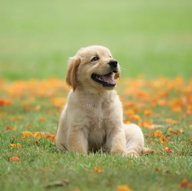

In [ ]:
im = PILImage.create('dog.jpg')
im.thumbnail((192,192))
im

In [ ]:
#|export
learn = load_learner('model.pkl')

In [ ]:
learn.predict(im)

('False', TensorBase(0), TensorBase([9.9999e-01, 8.4523e-06]))

In [ ]:
#|export
categories = ('Dog', 'Cat')

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [ ]:
classify_image(im)

{'Dog': 0.9999915361404419, 'Cat': 8.452258043689653e-06}

In [ ]:
#|export
image = gr.inputs.Image(shape=(192, 192))
label = gr.outputs.Label()
examples = ['dog.jpg', 'cat.jpg', 'dunno.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:7860/

To create a public link, set `share=True` in `launch()`.


(<fastapi.applications.FastAPI at 0x7fa03ba47670>,
 'http://127.0.0.1:7860/',
 None)

## end -

In [ ]:
from nbdev.export import notebook2script

In [ ]:
notebook2script('app.ipynb')

Converted app.ipynb.
